<a href="https://colab.research.google.com/github/uditrajmr3/tensorflow/blob/main/01_neural_regression_wth_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we are going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


### Creating data to view and fit

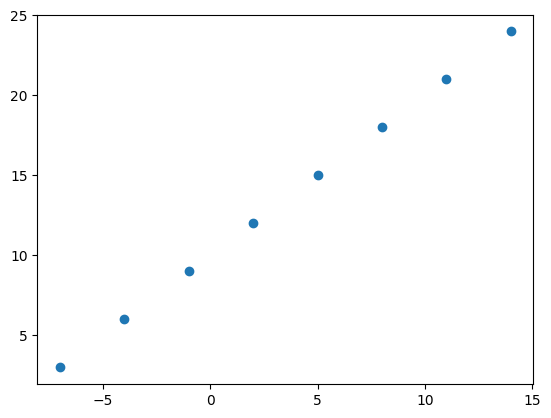

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14., ])

# Create labels
y = np.array([3., 6., 9., 12., 15., 18., 21., 24., ])

# Visualize it
plt.scatter(X, y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output Shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
# Turn NumPy arrays into tensors
tensor_X = tf.constant(X, dtype=tf.float32)
tensor_y = tf.constant(y, dtype=tf.float32)
tensor_X, tensor_y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [7]:
tensor_input_shape = tensor_X[0].shape
tensor_output_shape = tensor_y[0].shape
tensor_input_shape, tensor_output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns it's learning) and evaluation metrics (what we can use to interpret the performance of our model)
3. **Fitting a model** - letting the model try to find patterns between X and y (features & labels).

In [8]:
# Set random seed
tf.random.set_seed(26)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae: mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd: stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(tensor_X, axis=-1), tensor_y, epochs=20)

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 9.8718 - mae: 9.8718
Epoch 2/20
1/1 [==============================] - 0s 18ms/step - loss: 9.7393 - mae: 9.7393
Epoch 3/20
1/1 [==============================] - 0s 65ms/step - loss: 9.6068 - mae: 9.6068
Epoch 4/20
1/1 [==============================] - 0s 18ms/step - loss: 9.4743 - mae: 9.4743
Epoch 5/20
1/1 [==============================] - 0s 29ms/step - loss: 9.3418 - mae: 9.3418
Epoch 6/20
1/1 [==============================] - 0s 30ms/step - loss: 9.2093 - mae: 9.2093
Epoch 7/20
1/1 [==============================] - 0s 22ms/step - loss: 9.0768 - mae: 9.0768
Epoch 8/20
1/1 [==============================] - 0s 20ms/step - loss: 8.9443 - mae: 8.9443
Epoch 9/20
1/1 [==============================] - 0s 21ms/step - loss: 8.8118 - mae: 8.8118
Epoch 10/20
1/1 [==============================] - 0s 11ms/step - loss: 8.6793 - mae: 8.6793
Epoch 11/20
1/1 [==============================] - 0s 23ms/step - loss: 8.5468 - 

In [9]:
# Check out tensor_X and tensor_y
tensor_X, tensor_y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
# Try and make a prediction using our model
y_pred = model.predict([17.])
y_pred

1/1 [==============================] - 1s 513ms/step


array([[29.125154]], dtype=float32)

In [11]:
y_pred + 13

array([[42.125153]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model**: here we might add more layers, increase the number of hidden units (all called neurons) within each of those hidden layers, change the activation function of each layer.
2. **Compiling a model**: here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model**: here we might fit a model of more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [12]:
# Let's rebuild the model with improvement

#set the seed
tf.random.set_seed(26)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"],
)

# Fit the model
model.fit(tf.expand_dims(tensor_X, axis=-1), tensor_y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.2673 - mae: 13.2673
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 13.1348 - mae: 13.1348
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 13.0023 - mae: 13.0023
Epoch 4/100
1/1 [==============================] - 0s 25ms/step - loss: 12.8698 - mae: 12.8698
Epoch 5/100
1/1 [==============================] - 0s 26ms/step - loss: 12.7373 - mae: 12.7373
Epoch 6/100
1/1 [==============================] - 0s 25ms/step - loss: 12.6048 - mae: 12.6048
Epoch 7/100
1/1 [==============================] - 0s 28ms/step - loss: 12.4723 - mae: 12.4723
Epoch 8/100
1/1 [==============================] - 0s 29ms/step - loss: 12.3398 - mae: 12.3398
Epoch 9/100
1/1 [==============================] - 0s 26ms/step - loss: 12.2073 - mae: 12.2073
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 12.0748 - mae: 12.0748
Epoch 11/100
1/1 [==============================] -

In [13]:
# Try and make a prediction using our model
y_pred = model.predict([17.])
y_pred

1/1 [==============================] - 0s 186ms/step


array([[29.962591]], dtype=float32)

In [14]:
# Let's rebuild the model with improvement

#set the seed
tf.random.set_seed(26)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"],
)

# Fit the model
model.fit(tf.expand_dims(tensor_X, axis=-1), tensor_y, epochs=100)

# Try and make a prediction using our model
y_pred = model.predict([17.])
y_pred

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 15.5788 - mae: 15.5788
Epoch 2/100
1/1 [==============================] - 0s 46ms/step - loss: 14.9529 - mae: 14.9529
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 14.3454 - mae: 14.3454
Epoch 4/100
1/1 [==============================] - 0s 35ms/step - loss: 13.7608 - mae: 13.7608
Epoch 5/100
1/1 [==============================] - 0s 56ms/step - loss: 13.1835 - mae: 13.1835
Epoch 6/100
1/1 [==============================] - 0s 24ms/step - loss: 12.6187 - mae: 12.6187
Epoch 7/100
1/1 [==============================] - 0s 19ms/step - loss: 12.0548 - mae: 12.0548
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 11.4872 - mae: 11.4872
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 10.9039 - mae: 10.9039
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 10.2983 - mae: 10.2983
Epoch 11/100
1/1 [==============================] -

array([[32.24832]], dtype=float32)

In [15]:
# Let's rebuild the model with improvement

#set the seed
tf.random.set_seed(26)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"],
)

# Fit the model
model.fit(tf.expand_dims(tensor_X, axis=-1), tensor_y, epochs=100)

# Try and make a prediction using our model
y_pred = model.predict([17.])
y_pred

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.7118 - mae: 13.7118
Epoch 2/100
1/1 [==============================] - 0s 41ms/step - loss: 13.1473 - mae: 13.1473
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 12.5825 - mae: 12.5825
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 12.0145 - mae: 12.0145
Epoch 5/100
1/1 [==============================] - 0s 23ms/step - loss: 11.4401 - mae: 11.4401
Epoch 6/100
1/1 [==============================] - 0s 34ms/step - loss: 10.8566 - mae: 10.8566
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 10.2609 - mae: 10.2609
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 9.6499 - mae: 9.6499
Epoch 9/100
1/1 [==============================] - 0s 25ms/step - loss: 9.0204 - mae: 9.0204
Epoch 10/100
1/1 [==============================] - 0s 45ms/step - loss: 8.3692 - mae: 8.3692
Epoch 11/100
1/1 [==============================] - 0s 19

array([[27.467941]], dtype=float32)

In [16]:
# Let's rebuild the model with improvement

#set the seed
tf.random.set_seed(26)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"],
)

# Fit the model
model.fit(tf.expand_dims(tensor_X, axis=-1), tensor_y, epochs=100)

# Try and make a prediction using our model
y_pred = model.predict([17.])
y_pred

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.4929 - mae: 13.4929
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 13.3939 - mae: 13.3939
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 13.2950 - mae: 13.2950
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 13.1962 - mae: 13.1962
Epoch 5/100
1/1 [==============================] - 0s 25ms/step - loss: 13.0974 - mae: 13.0974
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 12.9988 - mae: 12.9988
Epoch 7/100
1/1 [==============================] - 0s 19ms/step - loss: 12.9003 - mae: 12.9003
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 12.8018 - mae: 12.8018
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 12.7034 - mae: 12.7034
Epoch 10/100
1/1 [==============================] - 0s 32ms/step - loss: 12.6052 - mae: 12.6052
Epoch 11/100
1/1 [==============================] -

1/1 [==============================] - 0s 266ms/step


array([[30.835354]], dtype=float32)

In [17]:
# Let's rebuild the model with improvement

#set the seed
tf.random.set_seed(26)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"],
)

# Fit the model
model.fit(tf.expand_dims(tensor_X, axis=-1), tensor_y, epochs=100)

# Try and make a prediction using our model
y_pred = model.predict([17.])
y_pred

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.2333 - mae: 13.2333
Epoch 2/100
1/1 [==============================] - 0s 22ms/step - loss: 12.2352 - mae: 12.2352
Epoch 3/100
1/1 [==============================] - 0s 32ms/step - loss: 11.2373 - mae: 11.2373
Epoch 4/100
1/1 [==============================] - 0s 28ms/step - loss: 10.2339 - mae: 10.2339
Epoch 5/100
1/1 [==============================] - 0s 23ms/step - loss: 9.2177 - mae: 9.2177
Epoch 6/100
1/1 [==============================] - 0s 23ms/step - loss: 8.1808 - mae: 8.1808
Epoch 7/100
1/1 [==============================] - 0s 25ms/step - loss: 7.1156 - mae: 7.1156
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 6.8370 - mae: 6.8370
Epoch 9/100
1/1 [==============================] - 0s 37ms/step - loss: 7.2698 - mae: 7.2698
Epoch 10/100
1/1 [==============================] - 0s 65ms/step - loss: 7.6485 - mae: 7.6485
Epoch 11/100
1/1 [==============================] - 0s 69ms/ste

1/1 [==============================] - 0s 114ms/step


array([[27.250883]], dtype=float32)

In [18]:
# Let's rebuild the model with improvement

#set the seed
tf.random.set_seed(26)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["mae"],
)

# Fit the model
model.fit(tf.expand_dims(tensor_X, axis=-1), tensor_y, epochs=100)

# Try and make a prediction using our model
y_pred = model.predict([17.])
y_pred

Epoch 1/100
1/1 [==============================] - 1s 744ms/step - loss: 14.8377 - mae: 14.8377
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 14.7283 - mae: 14.7283
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 14.6189 - mae: 14.6189
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 14.5098 - mae: 14.5098
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 14.4008 - mae: 14.4008
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 14.2919 - mae: 14.2919
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 14.1832 - mae: 14.1832
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 14.0746 - mae: 14.0746
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 13.9661 - mae: 13.9661
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 13.8577 - mae: 13.8577
Epoch 11/100
1/1 [==============================] 

array([[30.56438]], dtype=float32)

In [19]:
# Let's rebuild the model with improvement

#set the seed
tf.random.set_seed(26)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"],
)

# Fit the model
model.fit(tf.expand_dims(tensor_X, axis=-1), tensor_y, epochs=100)

# Try and make a prediction using our model
y_pred = model.predict([17.])
y_pred

Epoch 1/100
1/1 [==============================] - 1s 934ms/step - loss: 13.7516 - mae: 13.7516
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 8.1547 - mae: 8.1547
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.6408 - mae: 12.6408
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 11.2283 - mae: 11.2283
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 7.8103 - mae: 7.8103
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 7.8282 - mae: 7.8282
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 9.0423 - mae: 9.0423
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 9.4015 - mae: 9.4015
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 9.1999 - mae: 9.1999
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 8.5887 - mae: 8.5887
Epoch 11/100
1/1 [==============================] - 0s 10ms/st

array([[31.38142]], dtype=float32)

In [20]:
# Let's rebuild the model with improvement

#set the seed
tf.random.set_seed(26)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"],
)

# Fit the model
model.fit(tf.expand_dims(tensor_X, axis=-1), tensor_y, epochs=100)

# Try and make a prediction using our model
y_pred = model.predict([17.])
y_pred

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 12.5000 - mae: 12.5000
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 13.9436 - mae: 13.9436
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 9.6618 - mae: 9.6618
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 10.5623 - mae: 10.5623
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 8.8437 - mae: 8.8437
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 6.4148 - mae: 6.4148
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 7.5362 - mae: 7.5362
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 6.4662 - mae: 6.4662
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 6.2242 - mae: 6.2242
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 6.1662 - mae: 6.1662
Epoch 11/100
1/1 [==============================] - 0s 16ms/step 

array([[27.193682]], dtype=float32)

In [21]:
# Let's rebuild the model with improvement

#set the seed
tf.random.set_seed(26)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"],
)

# Fit the model
model.fit(tf.expand_dims(tensor_X, axis=-1), tensor_y, epochs=1000)

# Try and make a prediction using our model
y_pred = model.predict([17.])
y_pred

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 12.2904 - mae: 12.2904
Epoch 2/1000
1/1 [==============================] - 0s 13ms/step - loss: 16.6475 - mae: 16.6475
Epoch 3/1000
1/1 [==============================] - 0s 12ms/step - loss: 8.6010 - mae: 8.6010
Epoch 4/1000
1/1 [==============================] - 0s 11ms/step - loss: 9.6172 - mae: 9.6172
Epoch 5/1000
1/1 [==============================] - 0s 15ms/step - loss: 7.7889 - mae: 7.7889
Epoch 6/1000
1/1 [==============================] - 0s 10ms/step - loss: 7.3587 - mae: 7.3587
Epoch 7/1000
1/1 [==============================] - 0s 13ms/step - loss: 6.9874 - mae: 6.9874
Epoch 8/1000
1/1 [==============================] - 0s 10ms/step - loss: 6.3371 - mae: 6.3371
Epoch 9/1000
1/1 [==============================] - 0s 13ms/step - loss: 6.6203 - mae: 6.6203
Epoch 10/1000
1/1 [==============================] - 0s 10ms/step - loss: 5.8245 - mae: 5.8245
Epoch 11/1000
1/1 [==============================] - 0s 1

array([[28.973297]], dtype=float32)

In [22]:
# Make a bigger dataset
X = tf.range(-200, 200, 4)
X

<tf.Tensor: shape=(100,), dtype=int32, numpy=
array([-200, -196, -192, -188, -184, -180, -176, -172, -168, -164, -160,
       -156, -152, -148, -144, -140, -136, -132, -128, -124, -120, -116,
       -112, -108, -104, -100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,
        -68,  -64,  -60,  -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,
        -24,  -20,  -16,  -12,   -8,   -4,    0,    4,    8,   12,   16,
         20,   24,   28,   32,   36,   40,   44,   48,   52,   56,   60,
         64,   68,   72,   76,   80,   84,   88,   92,   96,  100,  104,
        108,  112,  116,  120,  124,  128,  132,  136,  140,  144,  148,
        152,  156,  160,  164,  168,  172,  176,  180,  184,  188,  192,
        196], dtype=int32)>

In [23]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(100,), dtype=int32, numpy=
array([-190, -186, -182, -178, -174, -170, -166, -162, -158, -154, -150,
       -146, -142, -138, -134, -130, -126, -122, -118, -114, -110, -106,
       -102,  -98,  -94,  -90,  -86,  -82,  -78,  -74,  -70,  -66,  -62,
        -58,  -54,  -50,  -46,  -42,  -38,  -34,  -30,  -26,  -22,  -18,
        -14,  -10,   -6,   -2,    2,    6,   10,   14,   18,   22,   26,
         30,   34,   38,   42,   46,   50,   54,   58,   62,   66,   70,
         74,   78,   82,   86,   90,   94,   98,  102,  106,  110,  114,
        118,  122,  126,  130,  134,  138,  142,  146,  150,  154,  158,
        162,  166,  170,  174,  178,  182,  186,  190,  194,  198,  202,
        206], dtype=int32)>

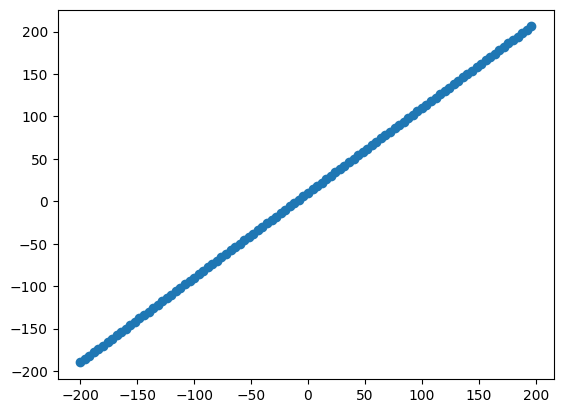

In [24]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* **Training Set** - the model learns from this data, which is typically 70-80% of the total data you have available
* **Validation Set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test Set** - the model gets evaluated on this data to test what model as learned, this set is typically 10-15% of the total data available.

In [25]:
# Check the length of how many samples are avialable
len(X)

100

In [26]:
# Split the data into train and test sets
X_train = X[:80] # (80% data from training)
y_train = y[:80] # (80% data from training)
X_test = X[80:] # (20% data for testing)
y_test = y[80:] # (20% data for testing)

len(X_train), len(X_test), len(y_train), len(y_test)

(80, 20, 80, 20)

### Visualize the data

Now that the data is divided into training and test sets, let's visualize it again

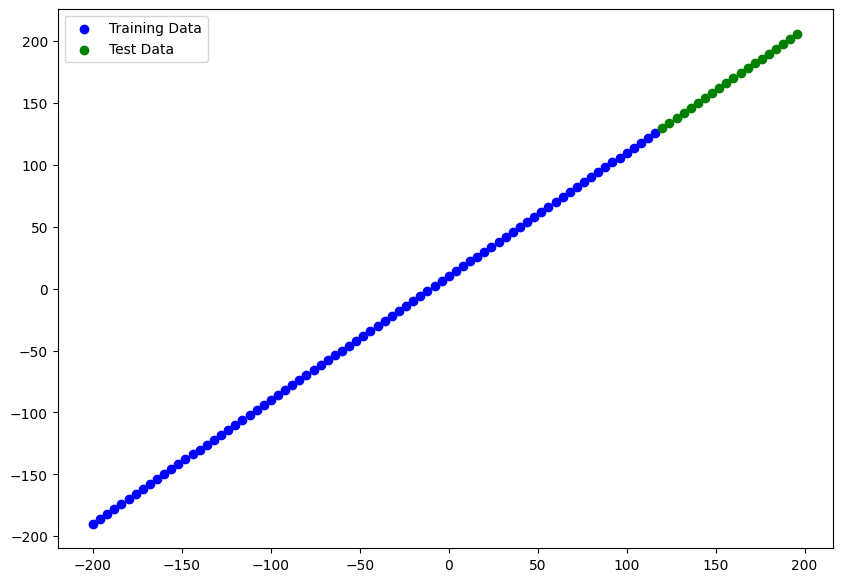

In [27]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training Data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Test Data")
# show a legend
plt.legend();

In [28]:
# Let's build a neural network for this data
# 0. Set the seed
tf.random.set_seed(26)

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"],
)

# 3. Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 10ms/step - loss: 123.8680 - mae: 123.8680
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 121.3099 - mae: 121.3099
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 118.7734 - mae: 118.7734
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 116.2262 - mae: 116.2262
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 113.6178 - mae: 113.6178
Epoch 6/100
3/3 [==============================] - 0s 7ms/step - loss: 111.0682 - mae: 111.0682
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 108.5088 - mae: 108.5088
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 105.9017 - mae: 105.9017
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 103.3862 - mae: 103.3862
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 100.7561 - mae: 100.7561
Epoch 11/100
3/3 [====================

### Visualizing the model

In [29]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 235ms/step - loss: 16.7344 - mae: 16.7344


[16.73444175720215, 16.73444175720215]

In [31]:
# let's create a model which builds automatically by defining the input_shape argument

# 0. Set the seed
tf.random.set_seed(26)

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(100, activation=None, name="hidden_layer"),
    tf.keras.layers.Dense(1, input_shape=[1], name="output_layer")
], name="model_with_input_shape")

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"],
)

In [32]:
model.summary()

Model: "model_with_input_shape"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 hidden_layer (Dense)        (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 303 (1.18 KB)
Trainable params: 303 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total numbers of parameters in the model
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable parameters - these are the parameters (patterns) the model cannot update as it trains. this is typical when we bring in the already learnt patterns or parameters from other models during **transfer learning**.

In [33]:
# 3. Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [34]:
model.summary()

Model: "model_with_input_shape"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 hidden_layer (Dense)        (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 303 (1.18 KB)
Trainable params: 303 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 258ms/step - loss: 6.7102 - mae: 6.7102


[6.71022891998291, 6.71022891998291]

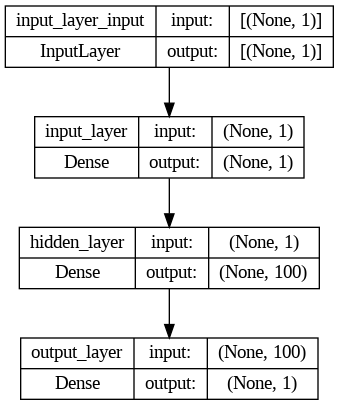

In [36]:
from tensorflow import keras
from keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing the model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` vs `y_pred` (ground truth vs model's predictions).

In [37]:
# Let's make some prediction
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 135ms/step


array([[135.08588],
       [139.25685],
       [143.42781],
       [147.59883],
       [151.76982],
       [155.94078],
       [160.11179],
       [164.28278],
       [168.45374],
       [172.62473],
       [176.79572],
       [180.96674],
       [185.13771],
       [189.30869],
       [193.47968],
       [197.65065],
       [201.82162],
       [205.99263],
       [210.1636 ],
       [214.33461]], dtype=float32)

In [38]:
y_test, y_pred

(<tf.Tensor: shape=(20,), dtype=int32, numpy=
 array([130, 134, 138, 142, 146, 150, 154, 158, 162, 166, 170, 174, 178,
        182, 186, 190, 194, 198, 202, 206], dtype=int32)>,
 array([[135.08588],
        [139.25685],
        [143.42781],
        [147.59883],
        [151.76982],
        [155.94078],
        [160.11179],
        [164.28278],
        [168.45374],
        [172.62473],
        [176.79572],
        [180.96674],
        [185.13771],
        [189.30869],
        [193.47968],
        [197.65065],
        [201.82162],
        [205.99263],
        [210.1636 ],
        [214.33461]], dtype=float32))

In [39]:
# Let's create a plotting function
def plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_pred
):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # plot the training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training Data")
  # plot the test data in green
  plt.scatter(test_data, test_labels, c="g", label="Test Data")
  # plot the predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # add the legend for info
  plt.legend();


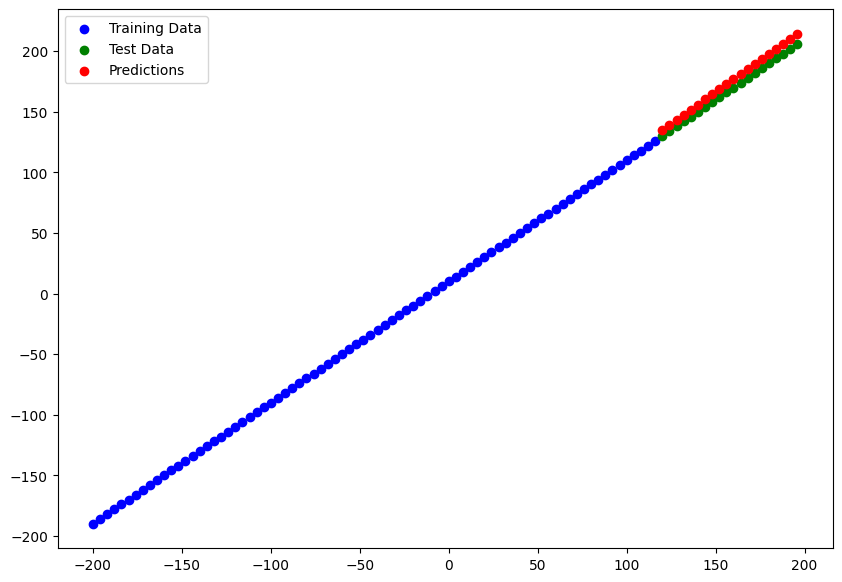

In [40]:
plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_pred
    )

### Evaluating our model's prediction with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE: mean absolute error; "on average, how wrong is each of the model's predictions"
* MSE: mean square error; "square the average errors"
* Huber: Combination of MAE &  MSE

In [41]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 59ms/step - loss: 6.7102 - mae: 6.7102


[6.71022891998291, 6.71022891998291]

In [42]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([33.5313  , 30.320202, 27.543314, 25.200584, 23.292072, 21.817766,
       20.777643, 20.171722, 20.      , 20.262472, 20.959143, 22.090021,
       23.655085, 25.654343, 28.087805, 30.955456, 34.2573  , 37.993366,
       42.163605, 46.33461 ], dtype=float32)>

In [43]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([135.08588, 139.25685, 143.42781, 147.59883, 151.76982, 155.94078,
       160.11179, 164.28278, 168.45374, 172.62473, 176.79572, 180.96674,
       185.13771, 189.30869, 193.47968, 197.65065, 201.82162, 205.99263,
       210.1636 , 214.33461], dtype=float32)>

In [44]:
y_test

<tf.Tensor: shape=(20,), dtype=int32, numpy=
array([130, 134, 138, 142, 146, 150, 154, 158, 162, 166, 170, 174, 178,
       182, 186, 190, 194, 198, 202, 206], dtype=int32)>

In [45]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=6.710232>

In [46]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=45.999313>

In [47]:
# Make some function to reuse MAE and MSE
def mae(y_true, y_pred):
  y_pred_squeezed = tf.squeeze(y_pred)
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=y_pred_squeezed);

In [48]:
def mse(y_true, y_pred):
  y_pred_squeezed = tf.squeeze(y_pred)
  return tf.metrics.mean_squared_error(y_true=y_true, y_pred=y_pred_squeezed);

### Running experiments to improve the model

1. Get more data - get more examples for the model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in form of more layers or more hidden units in each layers.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

In [49]:
X_train, y_train

(<tf.Tensor: shape=(80,), dtype=int32, numpy=
 array([-200, -196, -192, -188, -184, -180, -176, -172, -168, -164, -160,
        -156, -152, -148, -144, -140, -136, -132, -128, -124, -120, -116,
        -112, -108, -104, -100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,
         -68,  -64,  -60,  -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,
         -24,  -20,  -16,  -12,   -8,   -4,    0,    4,    8,   12,   16,
          20,   24,   28,   32,   36,   40,   44,   48,   52,   56,   60,
          64,   68,   72,   76,   80,   84,   88,   92,   96,  100,  104,
         108,  112,  116], dtype=int32)>,
 <tf.Tensor: shape=(80,), dtype=int32, numpy=
 array([-190, -186, -182, -178, -174, -170, -166, -162, -158, -154, -150,
        -146, -142, -138, -134, -130, -126, -122, -118, -114, -110, -106,
        -102,  -98,  -94,  -90,  -86,  -82,  -78,  -74,  -70,  -66,  -62,
         -58,  -54,  -50,  -46,  -42,  -38,  -34,  -30,  -26,  -22,  -18,
         -14,  -10,   -6,   -2,    2,    6,   10,   

In [50]:
# Set the seed
tf.random.set_seed(26)

In [51]:
# Create the model 1
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, name="output_layer"),
], name="model_1")

# compile the model 1
model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"],
)

# fit the model 1
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [52]:
# Create the model 2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None, name="hidden_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_2")

# compile the model 2
model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"],
)

# fit the model 2
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [53]:
# Create the model 3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None, name="hidden_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_3")

# compile the model 3
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"],
)

# fit the model 3
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 44ms/step


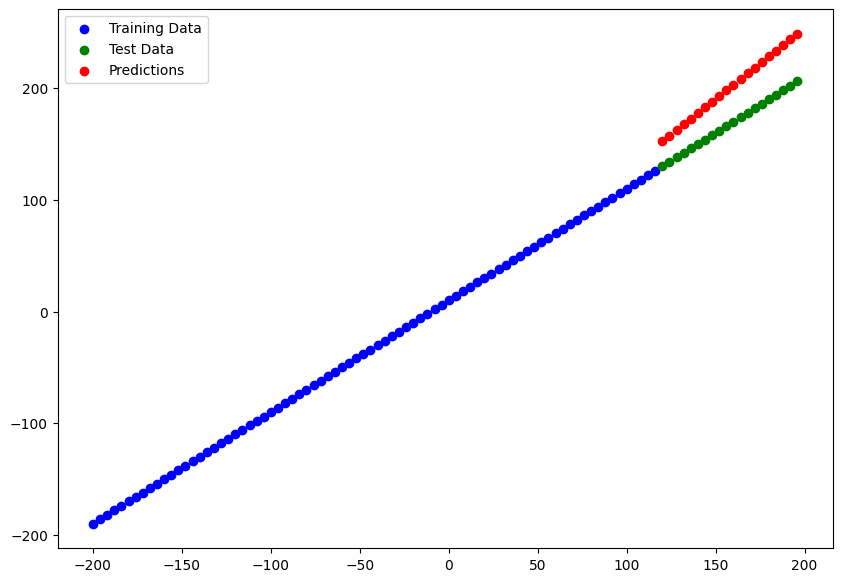

In [54]:
# Make and pllot predictions for model_1
y_pred_1 = model_1.predict(X_test)
plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_pred_1
)

1/1 [==============================] - 0s 55ms/step


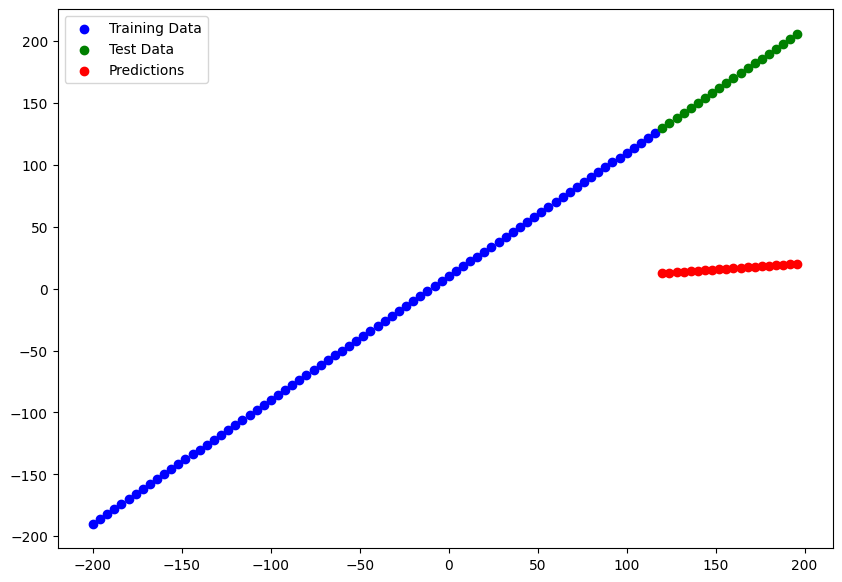

In [55]:
# Make and pllot predictions for model_2
y_pred_2 = model_2.predict(X_test)
plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_pred_2
)

1/1 [==============================] - 0s 54ms/step


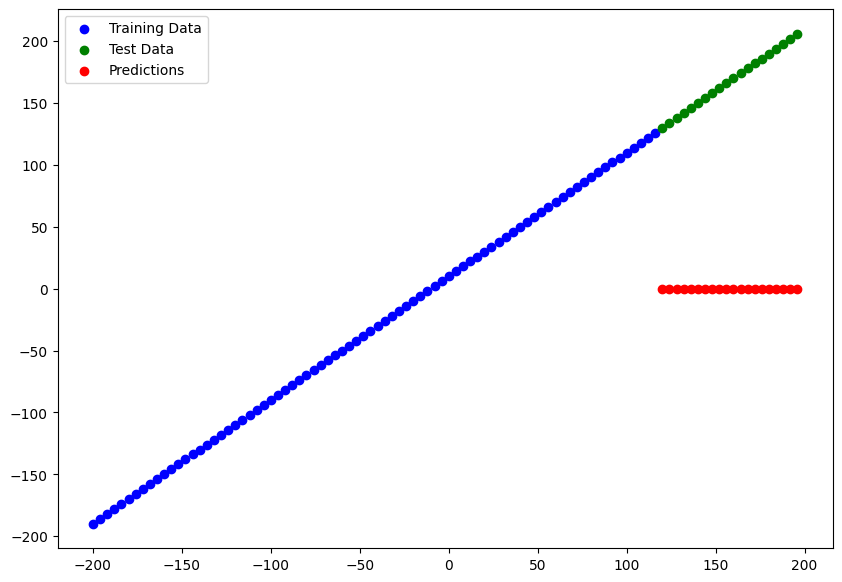

In [56]:
# Make and pllot predictions for model_3
y_pred_3 = model_3.predict(X_test)
plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_pred_3
)

In [57]:
y_pred_1

array([[152.46739],
       [157.52971],
       [162.59201],
       [167.65431],
       [172.71663],
       [177.77893],
       [182.84125],
       [187.90355],
       [192.96587],
       [198.02817],
       [203.09048],
       [208.15279],
       [213.2151 ],
       [218.2774 ],
       [223.33972],
       [228.40202],
       [233.46434],
       [238.52664],
       [243.58894],
       [248.65126]], dtype=float32)

In [58]:
# Calculate the model_1 evaluation metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=32.559326>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1097.6323>)

In [59]:
# Calculate the model_2 evaluation metrics
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=151.62567>,
 <tf.Tensor: shape=(), dtype=float32, numpy=23417.74>)

In [60]:
# Calculate the model_3 evaluation metrics
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=167.98264>,
 <tf.Tensor: shape=(), dtype=float32, numpy=28750.125>)

In [61]:
# Create the model 4
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None, name="hidden_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_4")

# compile the model 4
model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"],
)

# fit the model 4
model_4.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [62]:
# Create the model 5
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, name="input_layer"),
    tf.keras.layers.Dense(100, activation=None, name="hidden_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_4")

# compile the model 5
model_5.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"],
)

# fit the model 5
model_5.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 77ms/step


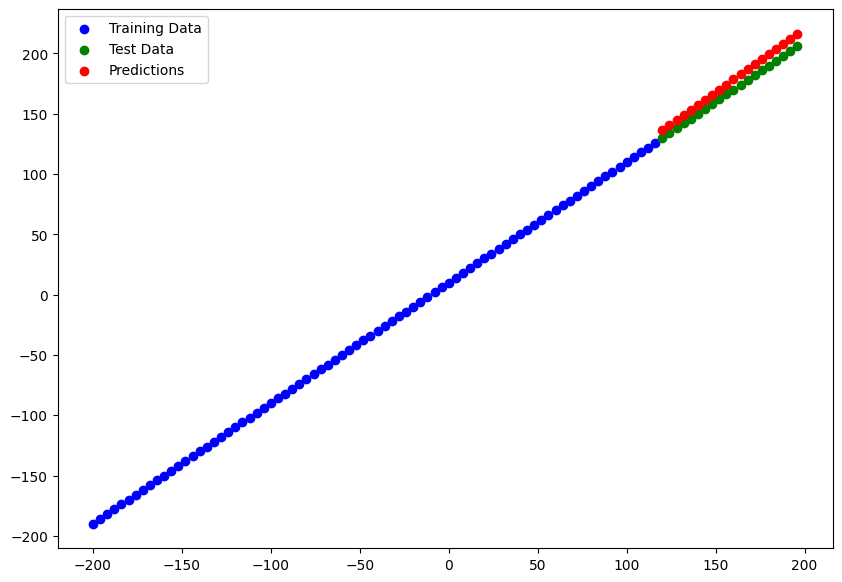

In [63]:
# Make and pllot predictions for model_4
y_pred_4 = model_4.predict(X_test)
plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_pred_4
)

1/1 [==============================] - 0s 76ms/step


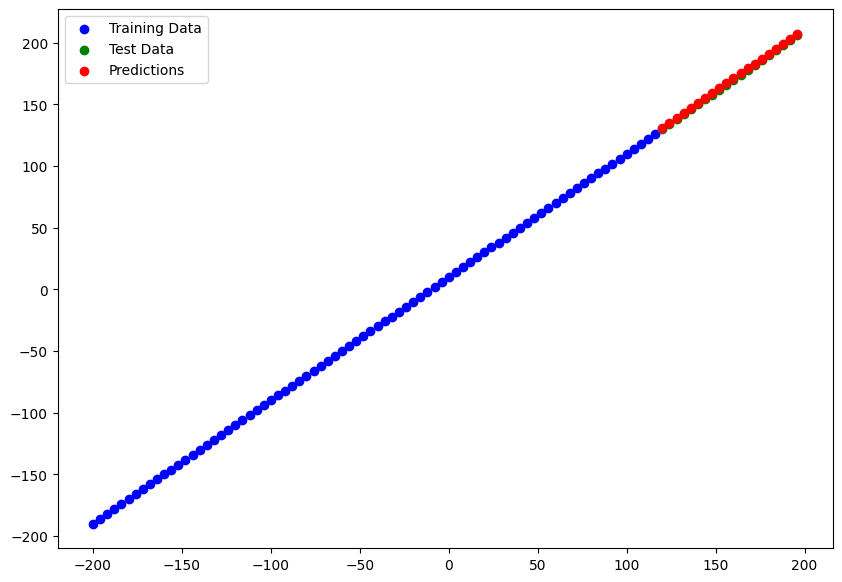

In [64]:
# Make and pllot predictions for model_5
y_pred_5 = model_5.predict(X_test)
plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_pred_5
)

In [65]:
# Calculate the model_4 evaluation metrics
mae_4 = mae(y_test, y_pred_4)
mse_4 = mse(y_test, y_pred_4)

mae_4, mse_4

(<tf.Tensor: shape=(), dtype=float32, numpy=8.348099>,
 <tf.Tensor: shape=(), dtype=float32, numpy=71.16023>)

In [66]:
# Calculate the model_5 evaluation metrics
mae_5 = mae(y_test, y_pred_5)
mse_5 = mse(y_test, y_pred_5)

mae_5, mse_5

(<tf.Tensor: shape=(), dtype=float32, numpy=1.0508293>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.1192279>)

### Comparing the results of the experiments

We've run a few experiments, let's compare the results.

In [67]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results =[
    ["model_1", mae_1.numpy(), mse_1.numpy()],
    ["model_2", mae_2.numpy(), mse_2.numpy()],
    ["model_3", mae_3.numpy(), mse_3.numpy()],
    ["model_4", mae_4.numpy(), mse_4.numpy()],
    ["model_5", mae_5.numpy(), mse_5.numpy()],
]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,32.559326,1097.632324
1,model_2,151.625671,23417.740234
2,model_3,167.982635,28750.125000
3,model_4,8.348099,71.160233
4,model_5,1.050829,1.119228


In [68]:
model_5.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 hidden_layer (Dense)        (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 303 (1.18 KB)
Trainable params: 303 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Tracking the experiments

One really good habit in machine learning modelling is to track the results of the experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us:

* TensorBoard - a component of the TensorFLow library to help track modelling experiments.
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving The Models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or mobile app.

There are 2 ways of saving the models:

1. The SavedModel format
2. The HDF5 format (Depricated)
3. Keras Format

In [69]:
# Save model using SavedModel format
model_5.save("best_model_SavedModel_format")

In [70]:
# Save model using HDF5 format
model_5.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [71]:
# Save model using keras format
model_5.save("best_model_Keras_format.keras")

## Loading a saved model

In [72]:
# Load in the SavedModel format
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 hidden_layer (Dense)        (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 303 (1.18 KB)
Trainable params: 303 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
# Compare model 5 predictions with SavedModel format model predictions
model_5_preds = model_5.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_5_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 57ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [74]:
# Load in the HDF5 format
loaded_HDF5_format = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_HDF5_format.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 hidden_layer (Dense)        (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 303 (1.18 KB)
Trainable params: 303 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
# Compare model 5 predictions with HDF5 format modal predictions
model_5_preds = model_5.predict(X_test)
loaded_HDF5_format_preds = loaded_HDF5_format.predict(X_test)
model_5_preds == loaded_HDF5_format_preds

1/1 [==============================] - 0s 55ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [76]:
# Load in the Keras format
loaded_Keras_format = tf.keras.models.load_model("best_model_Keras_format.keras")
loaded_Keras_format.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 hidden_layer (Dense)        (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 303 (1.18 KB)
Trainable params: 303 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
# Compare model 5 predictions woth Keras format model preictions
model_5_preds = model_5.predict(X_test)
loaded_Keras_format_preds = loaded_Keras_format.predict(X_test)
model_5_preds == loaded_Keras_format_preds

1/1 [==============================] - 0s 70ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click "download"
2. Use code (see the cell below)
3. Save it to Google Drive by connecting google drive and copying it from ther (see 2nd code cell below)

In [78]:
# Download a file from Google Colab
from google.colab import files
files.download("best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [79]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp best_model_HDF5_format.h5 /content/drive/MyDrive/tensorflow_models/

In [80]:
!ls /content/drive/MyDrive/tensorflow_models/

best_model_HDF5_format.h5


# A Larger Example

In [81]:
# import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [82]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [83]:
# Let's One-hot encode Dataframe using pandas
insurance_one_hot = pd.get_dummies(insurance, dtype=int)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [84]:
# Create X & y values (features & labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [85]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [86]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [87]:
# # Note: Fix: ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).
# boolean_columns = X.select_dtypes(include='bool').columns
# X[boolean_columns] = X[boolean_columns].astype(int)
# Note: Update: added dtype=int to get_dummies method above as another simpler solution

In [88]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [89]:
# Build a neural network (sort of like model 5)
# set the seed
tf.random.set_seed(42)

# Create the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
], name="insurance_model")

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics=["mae"])

# Convert y_train to float32 before creating the tensor
y_train_float = tf.cast(y_train, dtype=tf.float32)

# Fit the model
insurance_model.fit(X_train, y_train_float, epochs=100)


Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13312.5762 - mae: 13312.5762
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13072.0586 - mae: 13072.0586
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12525.4248 - mae: 12525.4248
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11557.9326 - mae: 11557.9326
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10218.2295 - mae: 10218.2295
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 8865.4863 - mae: 8865.4863
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7891.5356 - mae: 7891.5356
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7513.5977 - mae: 7513.5977
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7438.9082 - mae: 7438.9082
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7415.1450 - mae:

In [90]:
# Check the results of the insurance model in the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5237.6074 - mae: 5237.6074


[5237.607421875, 5237.607421875]

In [91]:
y_train.mean(), y_train.median()

(13346.089736364485, 9575.4421)

### Improve the model

In [92]:
# Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(11, name="input_layer"),
    tf.keras.layers.Dense(100, activation=None, name="hidden_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="insurance_model_2")

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics=["mae"])

# Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [93]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3191.9443 - mae: 3191.9443


[3191.9443359375, 3191.9443359375]

In [94]:
insurance_model_2.summary()

Model: "insurance_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 11)                132       
                                                                 
 hidden_layer (Dense)        (None, 100)               1200      
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 1433 (5.60 KB)
Trainable params: 1433 (5.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


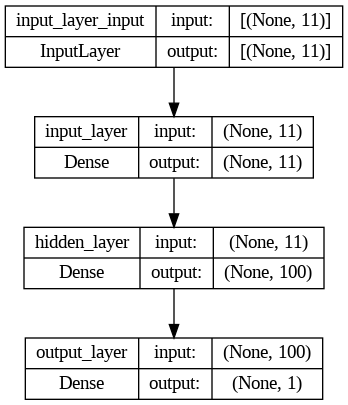

In [95]:
plot_model(insurance_model_2, show_shapes=True)

In [96]:
# Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, name="hidden_layer_1"),
    tf.keras.layers.Dense(100, activation=None, name="hidden_layer_2"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="insurance_model_3")

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics=["mae"])

# Fit the model
insurance_model_3.fit(X_train, y_train, epochs=100, verbose=0)

In [97]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3213.4780 - mae: 3213.4780


[3213.47802734375, 3213.47802734375]

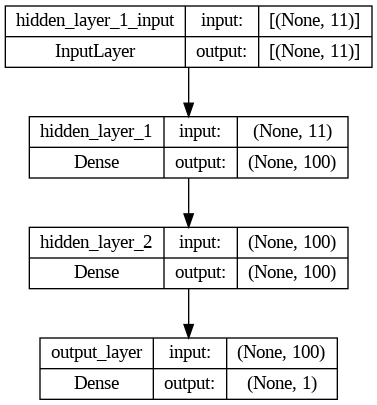

In [98]:
plot_model(insurance_model_3, show_shapes=True)

In [99]:
# Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, name="hidden_layer_1"),
    tf.keras.layers.Dense(100, activation=None, name="hidden_layer_2"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="insurance_model_4")

# Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                        metrics=["mae"])

# Fit the model
history = insurance_model_4.fit(X_train, y_train, epochs=500, verbose=0)

In [100]:
insurance_model_4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3160.8396 - mae: 3160.8396


[3160.839599609375, 3160.839599609375]

Text(0.5, 0, 'epochs')

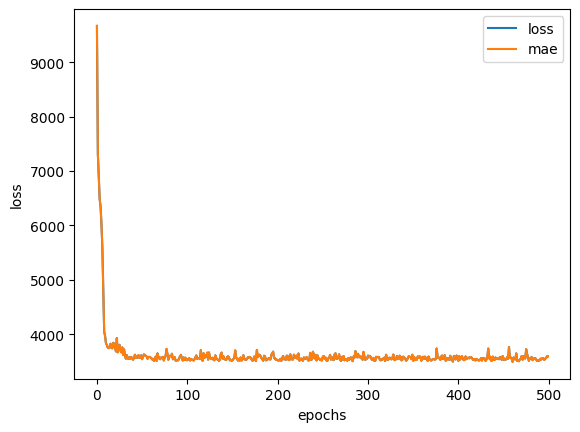

In [101]:
# Plot History (Also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [102]:
# Create the model
insurance_model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, name="hidden_layer_1"),
    tf.keras.layers.Dense(100, activation=None, name="hidden_layer_2"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="insurance_model_5")

# Compile the model
insurance_model_5.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                        metrics=["mae"])

# Fit the model
history_2 = insurance_model_5.fit(X_train, y_train, epochs=500, verbose=0)

In [103]:
insurance_model_5.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3157.6443 - mae: 3157.6443


[3157.644287109375, 3157.644287109375]

Text(0.5, 0, 'epochs')

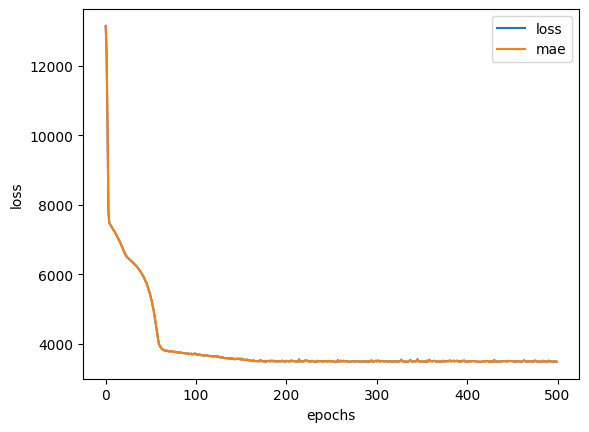

In [104]:
# Plot History (Also known as a loss curve or a training curve)
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing Data (Normalization and Standardization)

In terms of scaling values, neural networks tend to prefer normailization.

If you're not sure on which to use, you could try both and see which works better.

In [105]:
# import libraries here
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [106]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<Axes: ylabel='Frequency'>

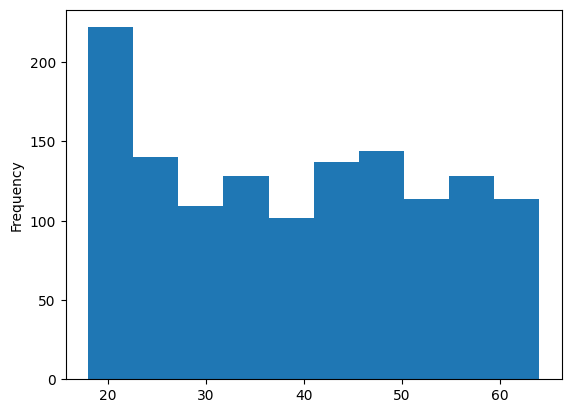

In [107]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

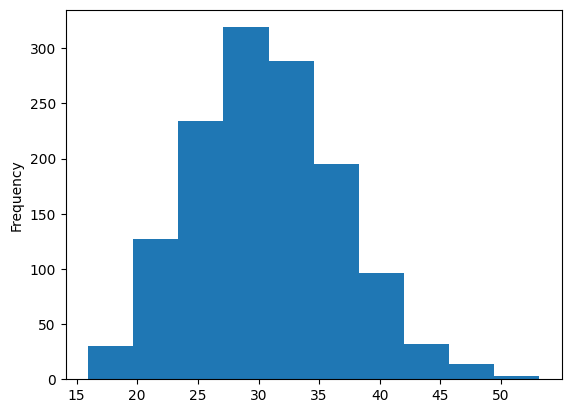

In [108]:
X["bmi"].plot(kind="hist")

In [109]:
X["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [110]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [112]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [113]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [114]:
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [116]:
# set the seed
tf.random.set_seed(42)

# Create the model
insurance_model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, name="hidden_layer_1"),
    tf.keras.layers.Dense(100, activation=None, name="hidden_layer_2"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="insurance_model_6")

# Compile the model
insurance_model_6.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                        metrics=["mae"])

# Fit the model
history_3 = insurance_model_6.fit(X_train_normal, y_train, epochs=500, verbose=0)

In [117]:
insurance_model_6.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 7ms/step - loss: 3178.0735 - mae: 3178.0735


[3178.073486328125, 3178.073486328125]